### imports

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Housing.csv')
display(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


### vectorizing

In [3]:
### x's will be: AGE, CRIM, IDUS and NOX
### y is MEDV
x_train = []
for i in range(407):
    x_train.append([data['AGE'][i], data['CRIM'][i], data['INDUS'][i], data['NOX'][i]])
x_train = np.array(x_train[:45])
y_train = np.array(data["MEDV"][:45])
y_train
# x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
# y_train = np.array([460, 232, 178])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2])

### algorithm

In [5]:
b = np.random.rand()
w = np.array([np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()])
# b_optimal = 785.1811367994083
# w_optimal = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

def prediction(x, w, b):
    y = np.dot(x, w)+b
    return y

def compute_cost(X, y, w, b):
    size = X.shape[0]
    cost = 0.0
    for i in range(size):
        f_wb = np.dot(X[i], w) + b
        cost = cost + (f_wb - y[i])**2
    cost = cost / (2*size)
    return cost

cost = compute_cost(x_train, y_train, w, b)
print(cost)
print(prediction(x_train[0,:], w, b))

def gradient(x, y, w, b):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0
    for i in range(m):
        error = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dw[j] = dw[j] + error * x[i, j]
        db = db + error
    dw = dw/m
    db = db/m
    return (dw, db)

def mulGradient(X, y, w_in, b_in, cost_function, gradient_function, lr, iterations):
    cost = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iterations):
        dw, db = gradient_function(X, y, w, b)
        w = w - lr*dw
        b = b - lr*db
        if i<100000:
            cost.append(cost_function(X, y, w, b))
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost[-1]:8.2f}  ")
    return w, b, cost

dw, db = gradient(x_train, y_train, w, b)
print (dw, db)

909.7224913471134
50.46257416587715
[2995.56922078   25.34195855  263.2482989    17.84935931] 33.41860212438084


### running

In [21]:
w = np.array([np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()])
b = 0.0

iterations = 350
lr = 0.000005

w_final, b_final, cost = mulGradient(x_train, y_train, w, b, compute_cost, gradient, lr, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
y_result = []
for i in range(m):
    y_result.append(np.dot(x_train[i], w_final) + b_final)
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  1140.56  
Iteration   35: Cost   231.09  
Iteration   70: Cost    97.45  
Iteration  105: Cost    77.78  
Iteration  140: Cost    74.85  
Iteration  175: Cost    74.39  
Iteration  210: Cost    74.28  
Iteration  245: Cost    74.23  
Iteration  280: Cost    74.18  
Iteration  315: Cost    74.14  
b,w found by gradient descent: -0.00,[0.19761649 0.03750025 0.41372134 0.50718361] 
prediction: 14.11, target value: 24.0
prediction: 18.76, target value: 21.6
prediction: 15.24, target value: 34.7
prediction: 10.19, target value: 33.4
prediction: 11.85, target value: 36.2
prediction: 12.73, target value: 28.7
prediction: 16.69, target value: 22.9
prediction: 22.52, target value: 27.1
prediction: 23.29, target value: 16.5
prediction: 20.50, target value: 18.9
prediction: 22.16, target value: 15.0
prediction: 19.91, target value: 18.9
prediction: 11.23, target value: 21.7
prediction: 15.88, target value: 20.4
prediction: 20.36, target value: 18.2
prediction: 14.83, target 

### plot

<function matplotlib.pyplot.show(close=None, block=None)>

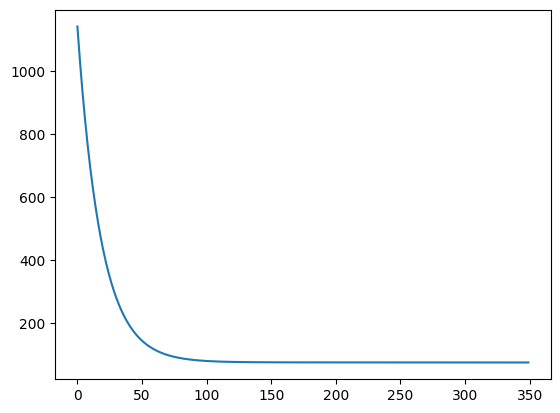

In [22]:
plt.plot(cost)
plt.show

# x_plot_age = []
# m = x_train.shape
# for i in range(45):
#     x_plot_age.append(x_train[i])

# plt.scatter(x_plot_age,401,color = 'r')
# plt.plot(y_result)